# World War 2 Weather Linear Regression
This dataset contains weather data from 1942 to 1945.
The dataset can be found at https://www.kaggle.com/smid80/weatherww2/data.

The goal of this notebook is to visualize some of the weather data, and create a linear regression model to predict certain aspects of the weather. 

NOTE: The particular notebook is for Single Variable Linear Regresion 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
weatherData = pd.read_csv('Summary of Weather.csv')
print(weatherData.head())

     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 N

As we see from the first few rows, theres a lot of columns with some information avaliable and without any available information.
For this first part, I want to try and predict the Max Temperature of a Station(STA) given the Min Temperature. This dataset contains over 119,000 rows, so the first 5 rows don't give me enough insight to how to begin organizing the data. So we'll start by displaying some column information and try to get a better feel for the data. There's a lot of columns I'm not interested in looking at later on, so we'll go ahead and create a table just looking at the columns we might use later on.

In [3]:
print(weatherData.columns)

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')


In [4]:
weatherData = weatherData[['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall']].copy()
weatherData.rename(columns = {'STA': 'Station'}, inplace = True)
print(weatherData.head())

   Station      Date Precip    MaxTemp    MinTemp   MeanTemp Snowfall
0    10001  1942-7-1  1.016  25.555556  22.222222  23.888889        0
1    10001  1942-7-2      0  28.888889  21.666667  25.555556        0
2    10001  1942-7-3   2.54  26.111111  22.222222  24.444444        0
3    10001  1942-7-4   2.54  26.666667  22.222222  24.444444        0
4    10001  1942-7-5      0  26.666667  21.666667  24.444444        0


Now that the table has been reduced and we're looking at information I find interesting, I first want to investigate how many weather stations are reporting in this dataset

In [5]:
print(weatherData.Station.unique())
print('Number of Weather Stations:',len(weatherData.Station.unique()))

[10001 10002 10101 10102 10502 10505 10701 10703 10704 10705 10718 10802
 10803 10804 10806 10807 11101 11103 11501 11601 11604 11606 11610 11615
 11701 11704 11801 11901 11902 12001 12101 12701 12702 12706 12801 13002
 13005 13007 13013 13201 13601 15027 16101 16201 16202 16405 16407 16504
 20501 20602 21501 22502 22504 22507 22508 22509 30001 31001 31101 31302
 31401 31501 31701 32301 32501 32503 32504 32601 32602 32603 32701 32702
 32801 32803 32805 32812 32815 32904 32906 32907 33003 33013 33014 33019
 33023 33031 33044 33109 33111 33117 33121 33123 33205 33206 33303 33305
 33307 33401 33405 33406 33501 34002 34003 34005 34012 34013 34017 34018
 34022 34101 34104 34105 34109 34111 34113 34123 34139 34147 34150 40601
 41204 41207 42204 42206 42401 43201 43302 43305 43307 44401 50301 50302
 50303 50304 50401 50403 50801 50802 60701 61501 61502 62701 80411 80412
 80425 80504 80509 80510 81404 81601 81702 82402 82403 82404 82405 82501
 82502 82503 82506]
Number of Weather Stations: 159

So there's a total of 159 weather stations reporting information. First, I'd like to take a look at building a linear regression model for the first station, and then perhaps one for all stations and see how the accuracy compares.

In [6]:
station10001 = weatherData.loc[weatherData.Station == 10001]
print(station10001)

      Station       Date Precip    MaxTemp    MinTemp   MeanTemp Snowfall
0       10001   1942-7-1  1.016  25.555556  22.222222  23.888889        0
1       10001   1942-7-2      0  28.888889  21.666667  25.555556        0
2       10001   1942-7-3   2.54  26.111111  22.222222  24.444444        0
3       10001   1942-7-4   2.54  26.666667  22.222222  24.444444        0
4       10001   1942-7-5      0  26.666667  21.666667  24.444444        0
5       10001   1942-7-6      0  26.666667  21.666667  24.444444        0
6       10001   1942-7-7      T  28.333333  22.777778  25.555556        0
7       10001   1942-7-8  3.556  26.666667  22.222222  24.444444        0
8       10001   1942-7-9      T  27.222222  22.777778  25.000000        0
9       10001  1942-7-10  3.556  25.555556  21.666667  23.333333        0
10      10001  1942-7-11      0  25.555556  21.666667  23.333333        0
11      10001  1942-7-12  0.508  24.444444  22.222222  23.333333        0
12      10001  1942-7-13      0  26.11

Based on this station, we see that the dates reported range from July 1, 1942 to August 31, 1945. An Issue to address is that the temperature reported is in Celcius, we can go ahead and convert that to Farenheit to make it easier to understand for us.


In [7]:
station10001['MaxTemp'] = station10001['MaxTemp'].apply(lambda x: ((x * 9/5) + 32) )
station10001['MinTemp'] = station10001['MinTemp'].apply(lambda x: ((x * 9/5) + 32) )
station10001['MeanTemp'] = station10001['MeanTemp'].apply(lambda x: ((x * 9/5) + 32) )
print(station10001.head())

   Station      Date Precip  MaxTemp  MinTemp  MeanTemp Snowfall
0    10001  1942-7-1  1.016     78.0     72.0      75.0        0
1    10001  1942-7-2      0     84.0     71.0      78.0        0
2    10001  1942-7-3   2.54     79.0     72.0      76.0        0
3    10001  1942-7-4   2.54     80.0     72.0      76.0        0
4    10001  1942-7-5      0     80.0     71.0      76.0        0


Now that everything is now easily understood, we can start with visualizations!

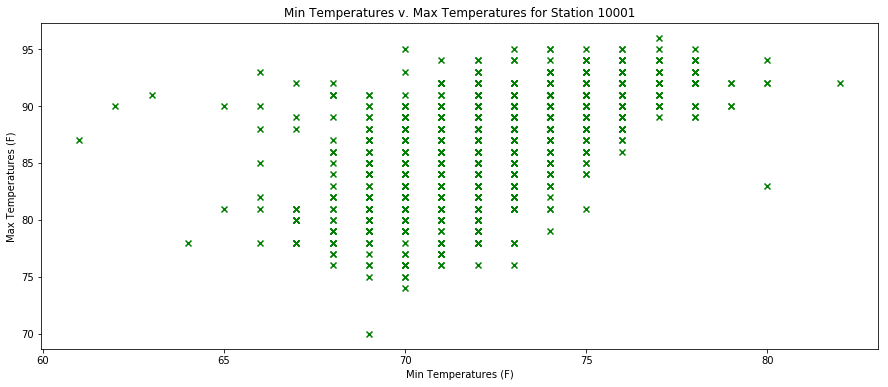

In [8]:
plt.figure(figsize = (15, 6))
plt.scatter(station10001.MinTemp, station10001.MaxTemp, color = 'green', marker = 'x')
plt.title('Min Temperatures v. Max Temperatures for Station 10001')
plt.xlabel('Min Temperatures (F)')
plt.ylabel('Max Temperatures (F)')
plt.show()

Just looking at the graph, we can see a large amount of the data roughly lies between 67 and 77 degrees farenheit and seems to indicate a strong positive linear relationship. Let's draw the line of best fit for the graph.

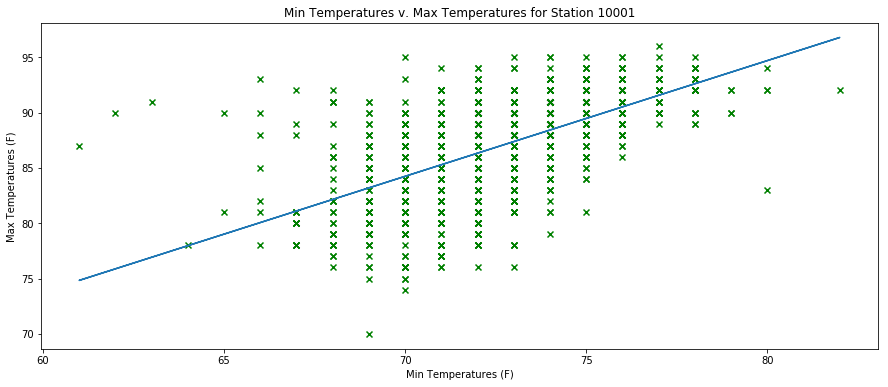

In [9]:
regression = LinearRegression()
minTemp = station10001.MinTemp
minTemp = minTemp.values.reshape(-1,1)

maxTemp = station10001.MaxTemp
maxTemp = maxTemp.values.reshape(-1,1)

model = regression.fit(minTemp, maxTemp)
predicted_maxTemp = regression.predict(minTemp)

plt.figure(figsize = (15, 6))
plt.scatter(station10001.MinTemp, station10001.MaxTemp, color = 'green', marker = 'x')
plt.title('Min Temperatures v. Max Temperatures for Station 10001')
plt.xlabel('Min Temperatures (F)')
plt.ylabel('Max Temperatures (F)')
plt.plot(minTemp, predicted_maxTemp)
plt.show()

With this line of best fit, we can now use it to come up with a rough prediction of a max temperature given a min temperature. Now that we have the line of best fit, let's go ahead and work on testing it's accuracy.

AttributeError: 'function' object has no attribute 'set_xticks'

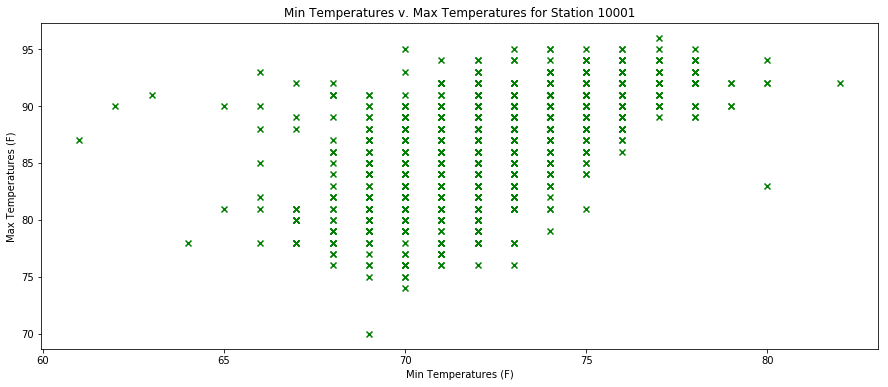

In [10]:
regression = LinearRegression()
minTemp = station10001.MinTemp
minTemp = minTemp.values.reshape(-1,1)

maxTemp = station10001.MaxTemp
maxTemp = maxTemp.values.reshape(-1,1)

model = regression.fit(minTemp, maxTemp)
predicted_maxTemp = regression.predict(minTemp)

plt.figure(figsize = (15, 6))
ax = plt.subplot
plt.scatter(station10001.MinTemp, station10001.MaxTemp, color = 'green', marker = 'x')
plt.title('Min Temperatures v. Max Temperatures for Station 10001')
plt.xlabel('Min Temperatures (F)')
plt.ylabel('Max Temperatures (F)')
ax.set_xticks([0,100])
ax.set_yticks([0,100])
plt.plot(minTemp, predicted_maxTemp)
plt.show()